### Задания для самостоятельного выполнения:

##### 1. Проверьте работу модели с разнымт начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму

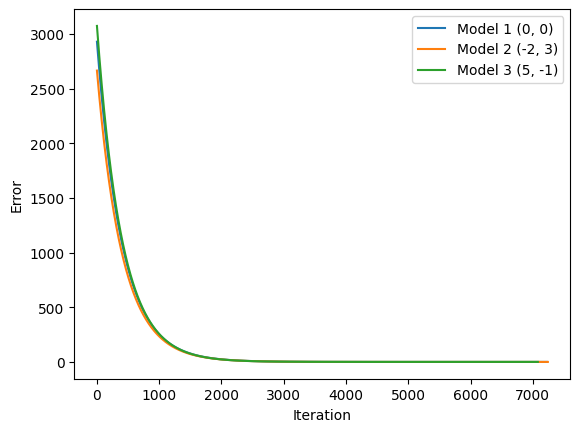

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y, alpha=0.001, max_iterations=10000):
        steps, errors = [], []
        for _ in range(max_iterations):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            steps.append(_)  # Номер итерации
            errors.append(new_err)
            # Проверка на сходимость (если изменение ошибки мало)
            if len(errors) > 1 and abs(errors[-1] - errors[-2]) < 1e-6:
                break
        return steps, errors

# Загрузка данных
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

# Создание нескольких моделей с разными начальными значениями
initial_values = [(0, 0), (-2, 3), (5, -1)]

plt.figure()

for i, (initial_b0, initial_b1) in enumerate(initial_values):
    # Создаем модель с заданными начальными значениями
    hyp = Model()
    hyp.b0 = initial_b0
    hyp.b1 = initial_b1

    # Обучаем модель
    steps, errors = hyp.fit(x, y)

    # Показываем график обучения
    plt.plot(steps, errors, label=f'Model {i + 1} ({initial_b0}, {initial_b1})')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()


##### Этот код создает три модели с разными начальными значениями b0 и b1 и отображает графики обучения для каждой модели. Если модель сходится к оптимальному решению, график обучения должен показать уменьшение ошибки с увеличением числа итераций.